In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings


warnings.filterwarnings('ignore')

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

used_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

### To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

#### 1: Determine all the variable types and find the fraction of the missing values for each variable.

In [6]:
used_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [7]:
used_df.isnull().sum()*100/used_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

#### 2: Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [8]:
used_copy_df = used_df.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for col in fill_list:
    used_copy_df.loc[:, col].fillna(used_copy_df.loc[:, col].mean(), inplace=True)

#### 3: Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [11]:
used_copy2_df = used_df.copy()

years = used_copy2_df["YEAR"].unique()

for col in fill_list:
    for year in years:
       used_copy2_df.loc[used_copy2_df["YEAR"] == year, col].fillna(
            used_copy2_df[used_copy2_df["YEAR"] == year][col].mean(), inplace=True)

#### 4: This time, fill in the missing values using interpolation (extrapolation).

In [13]:
used_copy3_df = used_df.copy()

for col in fill_list:
    used_copy3_df.loc[:, col].interpolate(inplace=True)

#### 5: Compare your results for the second, third and the fourth questions. Do you find any meaningful differences?¶

In [14]:
for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([used_df[col], used_copy_df[col],
                     used_copy2_df[col], used_copy3_df[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.229000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.159308e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  1.065280e+06  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.583140e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  6.483130e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  1.014528e+06  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.280000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.092082e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.174519e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.186

         GRADES_KG_G    GRADES_KG_G    GRADES_KG_G    GRADES_KG_G
count    1360.000000    1492.000000    1360.000000    1492.000000
mean    63746.761029   63746.761029   63746.761029   59021.465818
std     80205.138143   76572.547833   80205.138143   78271.025323
min       544.000000     544.000000     544.000000     544.000000
25%     11745.000000   14016.000000   11745.000000    9926.750000
50%     41597.500000   48897.000000   41597.500000   38507.000000
75%     73865.250000   70372.750000   73865.250000   70748.750000
max    530531.000000  530531.000000  530531.000000  530531.000000
Statistics for columns: GRADES_4_G
          GRADES_4_G     GRADES_4_G     GRADES_4_G     GRADES_4_G
count    1361.000000    1492.000000    1361.000000    1492.000000
mean    64538.927259   64538.927259   64538.927259   59797.646113
std     80293.387625   76684.998585   80293.387625   78406.899202
min       633.000000     633.000000     633.000000     633.000000
25%     13739.000000   15195.500000   137

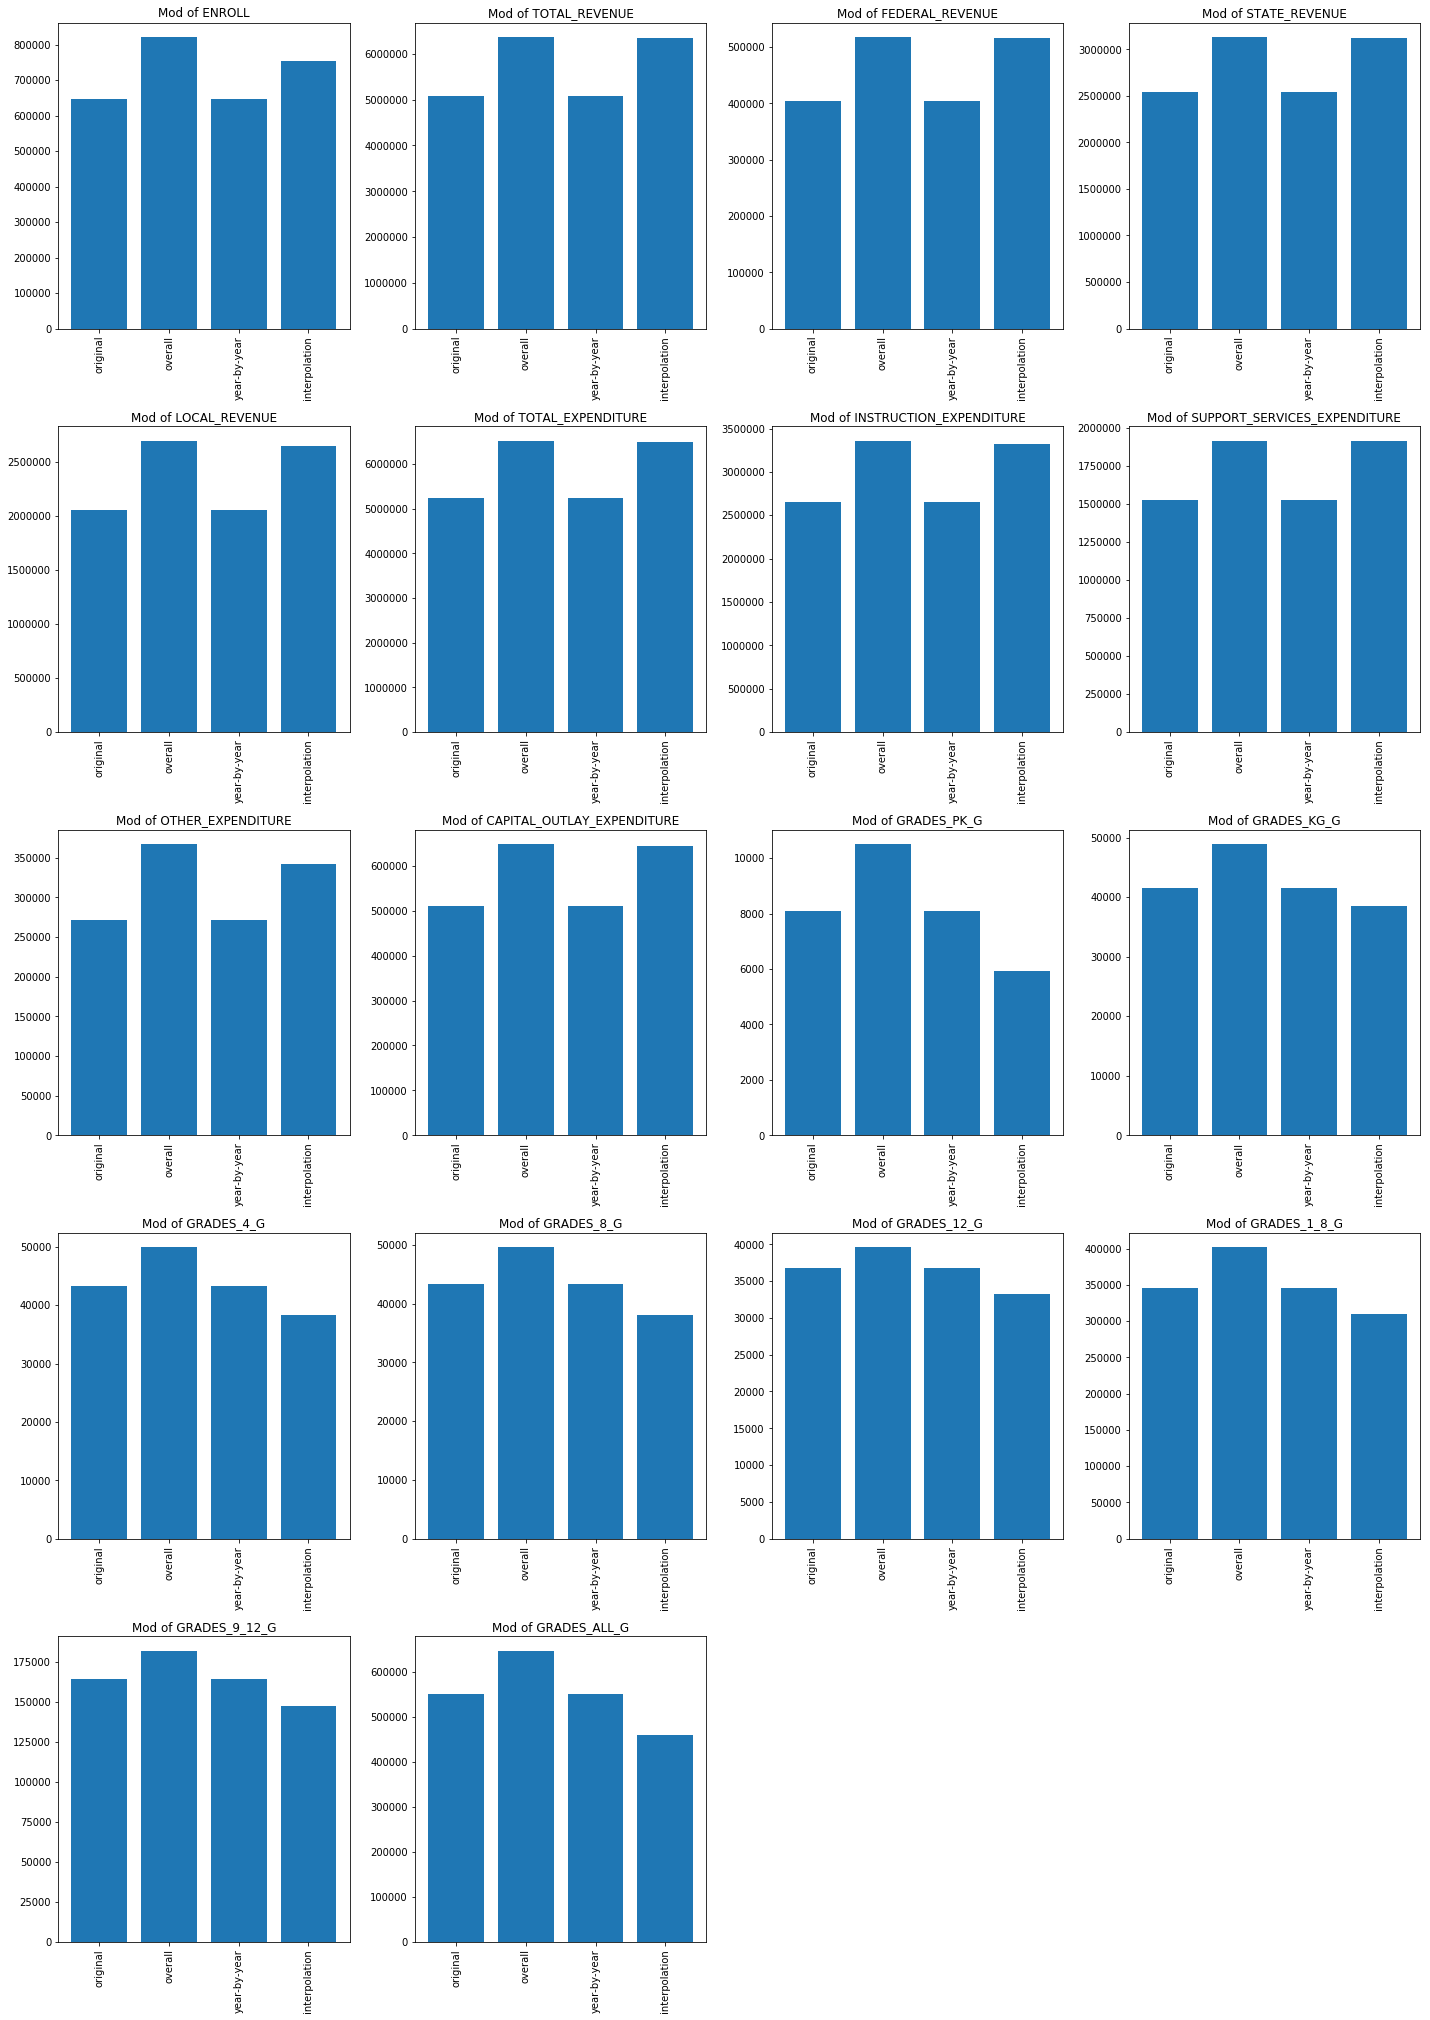

In [17]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([used_df[col], used_copy_df[col],
                     used_copy2_df[col], used_copy3_df[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()

From the expediture categories, we see that the median values of the original and year-by-year being very close in value, as well as the overall and interpolation median values being very close to equal.
In the grades categories we see again, the orignial and year-by-year medians very close to equal. In these categories however, the overall data set has increased the median value above the grouping and the interpolation method has decreased the median value below the grouping. 